**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(401.5), np.float64(587.5), np.float64(-0.5))

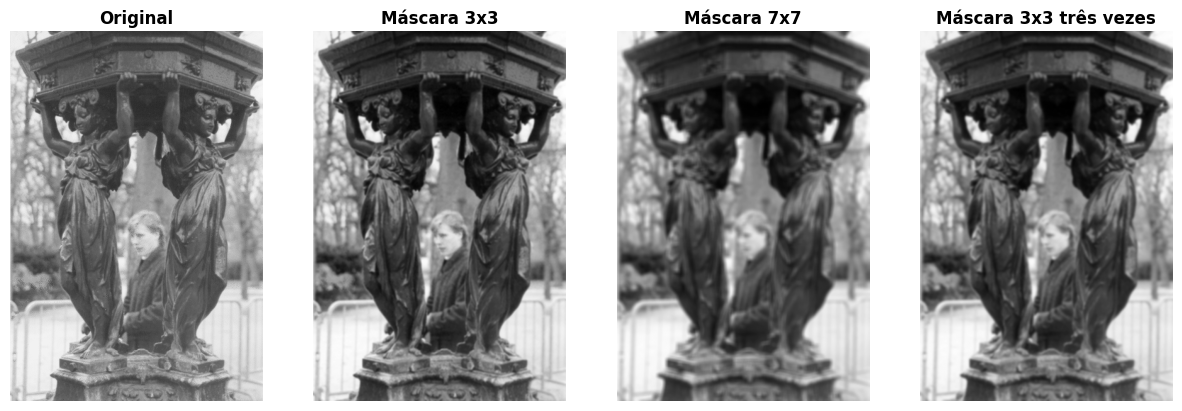

In [ ]:
# code here

plt.figure(figsize = (15, 15)) 

plt.subplot(1, 4, 1)
img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

#Máscaras
kernel3 = np.ones((3, 3), np.float32)/9 
kernel7 = np.ones((7, 7), np.float32)/49

# 3x3 uma vez
plt.subplot(1, 4, 2)
img1_3x3 = cv2.filter2D(img1, -1, kernel3)
plt.imshow(img1_3x3, cmap='gray')
plt.title("Máscara 3x3")
plt.axis('off')

# 7x7
plt.subplot(1, 4, 3)
img1_7x7 = cv2.filter2D(img1, -1, kernel7)
plt.imshow(img1_7x7, cmap='gray')
plt.title("Máscara 7x7")
plt.axis('off')

# 3x3 3 vezes
plt.subplot(1, 4, 4)
img1_3x3_2 = cv2.filter2D(img1_3x3, -1, kernel3)
img1_3x3_3 = cv2.filter2D(img1_3x3_2, -1, kernel3)
plt.imshow(img1_3x3_3, cmap='gray')
plt.title("Máscara 3x3 três vezes")
plt.axis('off')

 

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

(np.float64(-0.5), np.float64(199.5), np.float64(302.5), np.float64(-0.5))

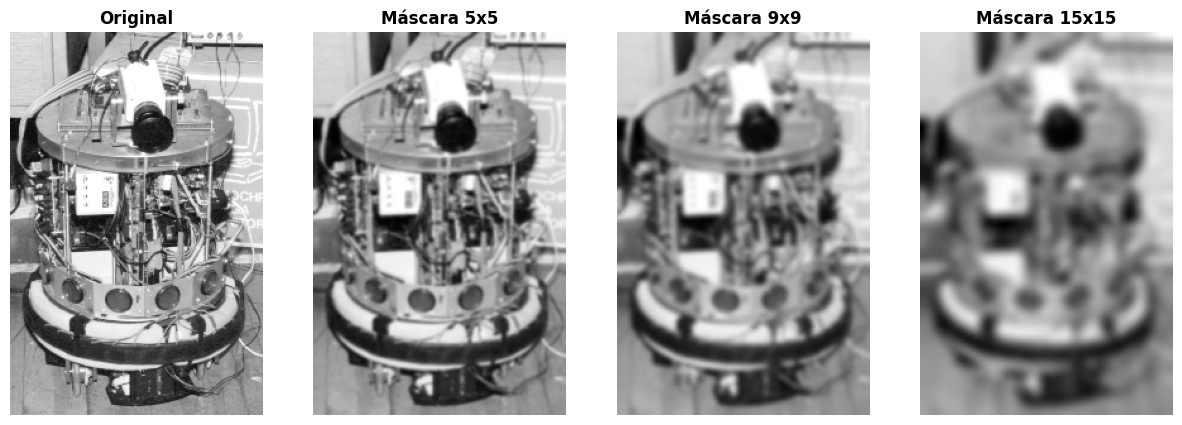

In [ ]:
#  code here

plt.figure(figsize = (15, 15)) 

img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

def gauss_xy(x, y, sigma):
    fator = 1.0 / (2 * np.pi * (sigma ** 2))
    g = fator * np.exp(-(x**2 + y**2) / (2 * (sigma ** 2)))
    return g

def gaussian_kernel_5x5(sigma=1.0):
    a = 2
    b = 2

    kernel = np.zeros((5, 5), dtype=np.float64)

    for x in range(-a, a+1):       
        for y in range(-b, b+1):   
            kernel[x + a, y + b] = gauss_xy(x, y, sigma)

    # normalizando (soma = 1)
    kernel /= kernel.sum()
    return kernel

def gaussian_kernel_9x9(sigma=2.0):
    a = 4
    b = 4

    kernel = np.zeros((9, 9), dtype=np.float64)

    for x in range(-a, a+1):       
        for y in range(-b, b+1):   
            kernel[x + a, y + b] = gauss_xy(x, y, sigma)

    # normalizando (soma = 1)
    kernel /= kernel.sum()
    return kernel

def gaussian_kernel_15x15(sigma=4.0):
    a = 7
    b = 7

    kernel = np.zeros((15, 15), dtype=np.float64)

    for x in range(-a, a+1):       
        for y in range(-b, b+1):   
            kernel[x + a, y + b] = gauss_xy(x, y, sigma)

    # normalizando (soma = 1)
    kernel /= kernel.sum()
    return kernel

k_5x5 = gaussian_kernel_5x5(sigma=1.0)
k_9x9 = gaussian_kernel_9x9(sigma=2.0)
k_15x15 = gaussian_kernel_15x15(sigma=4.0)

#Original
plt.subplot(1, 4, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

#Máscara 5x5
plt.subplot(1, 4, 2)
img2_5x5_gaussian = cv2.filter2D(img2, -1, k_5x5)
plt.imshow(img2_5x5_gaussian, cmap='gray')
plt.title("Máscara 5x5")
plt.axis('off')

#Máscara 5x5
plt.subplot(1, 4, 3)
img2_9x9_gaussian = cv2.filter2D(img2, -1, k_9x9)
plt.imshow(img2_9x9_gaussian, cmap='gray')
plt.title("Máscara 9x9")
plt.axis('off')

#Máscara 5x5
plt.subplot(1, 4, 4)
img2_15x15_gaussian = cv2.filter2D(img2, -1, k_15x15)
plt.imshow(img2_15x15_gaussian, cmap='gray')
plt.title("Máscara 15x15")
plt.axis('off')

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

(np.float64(-0.5), np.float64(401.5), np.float64(587.5), np.float64(-0.5))

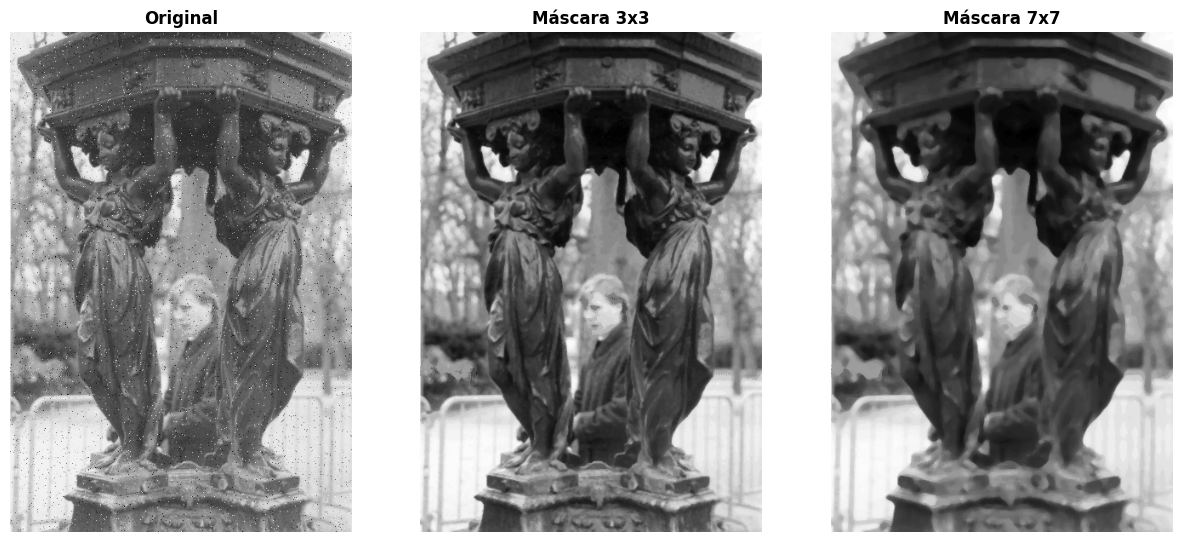

In [ ]:
# code here

plt.figure(figsize = (15, 15)) 

plt.subplot(1, 3, 1)
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

def median_filter(img, ksize):
    pad = ksize // 2
    
    # replica bordas
    padded = np.pad(img, pad, mode='edge')
    out = np.zeros_like(img)

    linhas = img.shape[0]
    colunas = img.shape[1]
    for i in range(linhas):
        for j in range(colunas):
            janela = padded[i:i+ksize, j:j+ksize]
            out[i, j] = np.median(janela)

    return out

# 3x3 uma vez
plt.subplot(1, 3, 2)
img3_3x3_median = median_filter(img3, 3)
plt.imshow(img3_3x3_median, cmap='gray')
plt.title("Máscara 3x3")
plt.axis('off')

# 7x7
plt.subplot(1, 3, 3)
img3_7x7_median = median_filter(img3, 7)
plt.imshow(img3_7x7_median, cmap='gray')
plt.title("Máscara 7x7")
plt.axis('off')


4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

(np.float64(-0.5), np.float64(401.5), np.float64(587.5), np.float64(-0.5))

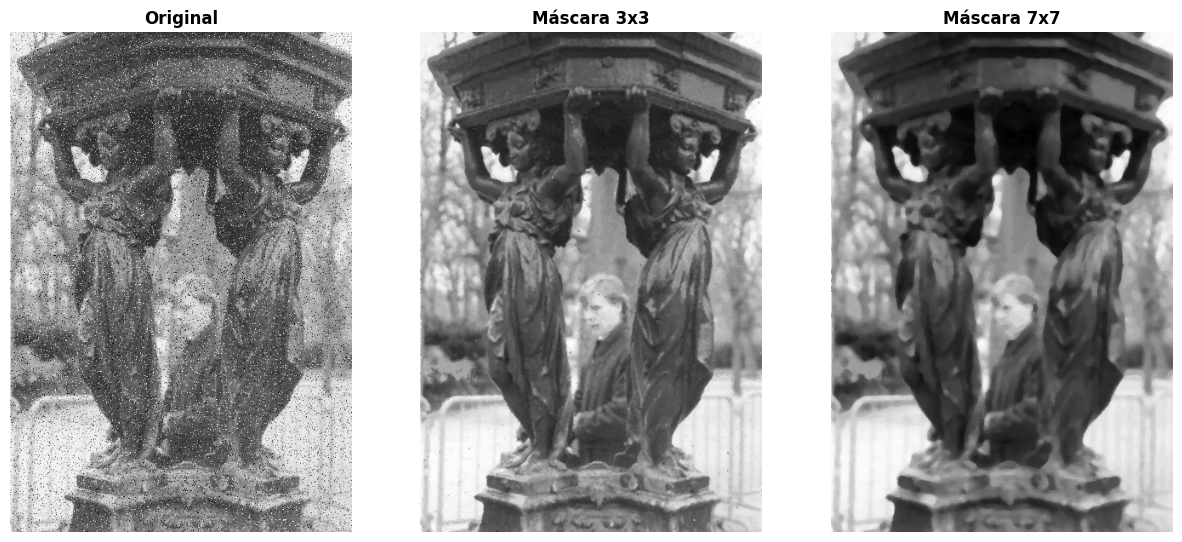

In [13]:
#  code here
plt.figure(figsize = (15, 15)) 

plt.subplot(1, 3, 1)
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

def median_filter(img, ksize):
    pad = ksize // 2
    
    # replica bordas
    padded = np.pad(img, pad, mode='edge')
    out = np.zeros_like(img)

    linhas = img.shape[0]
    colunas = img.shape[1]
    for i in range(linhas):
        for j in range(colunas):
            janela = padded[i:i+ksize, j:j+ksize]
            out[i, j] = np.median(janela)

    return out

# 3x3 uma vez
plt.subplot(1, 3, 2)
img3_3x3_median = median_filter(img3, 3)
plt.imshow(img3_3x3_median, cmap='gray')
plt.title("Máscara 3x3")
plt.axis('off')

# 7x7
plt.subplot(1, 3, 3)
img3_7x7_median = median_filter(img3, 7)
plt.imshow(img3_7x7_median, cmap='gray')
plt.title("Máscara 7x7")
plt.axis('off')
